# Decision Trees Exercises

Need to use Regression Tree instand of Decision tree classifier because are using the continuous feature
* from sklearn.tree import DecisionTreeRegressor

## Introduction

We will be using the wine quality data set for these exercises. This data set contains various chemical properties of wine, such as acidity, sugar, pH, and alcohol. It also contains a quality metric (3-9, with highest being better) and a color (red or white). The name of the file is `Wine_Quality_Data.csv`.

In [1]:
from __future__ import print_function
import os
data_path = ['..', '..', 'data']

## Question 1

* Import the data and examine the features.
* We will be using all of them to predict `color` (white or red), but the colors feature will need to be integer encoded.

In [2]:
import numpy as np
import pandas as pd

# Import Data
wineData = pd.read_csv('Wine_Quality_Data.csv')

wineData.tail()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white


In [2]:
wineData.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')

In [3]:
wineData['color']

0         red
1         red
2         red
3         red
4         red
        ...  
6492    white
6493    white
6494    white
6495    white
6496    white
Name: color, Length: 6497, dtype: object

In [4]:
wineData.shape[0]

6497

In [5]:
wineData.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
color                    object
dtype: object

In [3]:
# Examine the features

# Convert the color feature to an integer. This is a quick way to do it using Pandas.
wineData['color'] = wineData.color.replace('white',0).replace('red',1).astype(np.int)

In [7]:
wineData['color']

0       1
1       1
2       1
3       1
4       1
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Name: color, Length: 6497, dtype: int32

In [8]:
wineData.tail()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,0


## Question 2

* Use `StratifiedShuffleSplit` to split data into train and test sets that are stratified by wine quality. If possible, preserve the indices of the split for question 5 below.
* Check the percent composition of each quality level for both the train and test data sets.

In [4]:
# All data columns except for color

feature_cols = [x for x in wineData.columns if x not in 'color']
X = wineData[feature_cols] # Or X_data = wineData.iloc[:,:-1]

y = wineData['color']

In [10]:
X

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [15]:
y

0       1
1       1
2       1
3       1
4       1
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Name: color, Length: 6497, dtype: int32

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

array([0.9888664])

Now check the percent composition of each quality level in the train and test data sets. The data set is mostly white wine, as can be seen below.

In [ ]:
# To test it whether is balance dataset or not

# To makesure thatyou traing set and testing set are splutted equally
So that it wouldn't split until all of the training set only has red white (Example: training set = 100% of red wine, testing set= 100% white wine)

In [101]:
y_train.value_counts(normalize=True).sort_index()


0    0.757937
1    0.242063
Name: color, dtype: float64

Output: 
* 75% is white wine
* 24% is red wine
* for training set


In [102]:
y_test.value_counts(normalize=True).sort_index()

0    0.737692
1    0.262308
Name: color, dtype: float64

In [ ]:
Output: 
* 73% is white wine
* 26% is red wine
* for testing set


* red - Test & Training set - quite balance
* white - Test & Training set - quite balance

## Question 3

* Fit a decision tree classifier with no set limits on maximum depth, features, or leaves.
* Determine how many nodes are present and what the depth of this (very large) tree is.
* Using this tree, measure the prediction error in the train and test data sets. What do you think is going on here based on the differences in prediction error?

In [9]:
# Fit data with no setting in parameters

from sklearn.tree import DecisionTreeClassifier

tree_reg = DecisionTreeClassifier()
tree_reg.fit(X_train, y_train)


DecisionTreeClassifier()

In [10]:
y_pred = tree_reg.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0])

* The number of nodes and the maximum actual depth.

In [28]:
# The number of nodes
nodeCount = tree_reg.tree_.node_count
print("The number of nodes: ", nodeCount)

The number of nodes:  161


In [29]:
# The maximum actual depth
max_depth = tree_reg.tree_.max_depth
print("The maximum actual depth: ", max_depth)

The maximum actual depth:  19


* Performance metrics

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision Score: ", precision_score(y_test, y_pred))
print("Recall Score: ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))

# Refer to previous practicals to obtain the performance metrics for training set and testing set

Accuracy:  0.98
Precision Score:  0.9591836734693877
Recall Score:  0.9648093841642229
F1 Score:  0.9619883040935672


## Funtion Return error matrics (Can't run )

In [115]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def measure_error(y_true, y_pred, label):
    return pd.Series({"Accuracy: ", accuracy_score(y_test, y_pred2), 
                      "Precision Score: ", precision_score(y_test, y_pred2), 
                      "Recall Score: ", recall_score(y_test, y_pred2), 
                      "F1 Score: ", f1_score(y_test, y_pred2)},
                    name = label)


In [ ]:
# The error on the training and test data sets
y_train_pred = tree_reg.predict(X_train)
y_test_pred = tree_reg.predict(X_test)

train = measure_error(y_train, y_train_pred, 'train')
test = measure_error(y_test, y_test_pred, 'test')


## Question 4

* Using grid search with cross validation, find a decision tree that performs well on the test data set. Use a different variable name for this decision tree model than in question 3 so that both can be used in question 6.
* Determine the number of nodes and the depth of this tree.
* Measure the errors on the training and test sets as before and compare them to those from the tree in question 3.

In [33]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':range(1, tree_reg.tree_.max_depth+1, 2),
              'max_features': range(1, len(tree_reg.feature_importances_)+1)}

GR = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid=param_grid,
                  scoring='accuracy',
                  n_jobs=-1)

GR = GR.fit(X_train, y_train)

In [40]:
y_pred2 = GR.predict(X_test)
y_pred2

array([0, 1, 0, ..., 0, 0, 0])

The number of nodes and the maximum depth of the tree.

In [100]:
# The number of nodes

nodeCount2 = GR.best_estimator_.tree_.max_depth
print(nodeCount2)


11


In [98]:
# The number of nodes

max_depth2 = GR.best_estimator_.tree_.node_count
print(max_depth2)

135


In [78]:
GR.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 11,
 'max_features': 9,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 42,
 'splitter': 'best'}

In [104]:
GR.best_estimator_.tree_.node_count, GR.best_estimator_.tree_.max_depth

(135, 11)

These test errors are a little better than the previous ones. So it would seem the previous example overfit the data, but only slightly so.

In [117]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy: ", accuracy_score(y_test, y_pred2))
print("Precision Score: ", precision_score(y_test, y_pred2))
print("Recall Score: ", recall_score(y_test, y_pred2))
print("F1 Score: ", f1_score(y_test, y_pred2))

# Refer to previous practicals to obtain the performance metrics for training set and testing set

Accuracy:  0.9861538461538462
Precision Score:  0.9792284866468842
Recall Score:  0.967741935483871
F1 Score:  0.9734513274336284


## Question 5

* Re-split the data into `X` and `y` parts, this time with `residual_sugar` being the predicted (`y`) data. *Note:* if the indices were preserved from the `StratifiedShuffleSplit` output in question 2, they can be used again to split the data.
* Using grid search with cross validation, find a decision tree **regression** model that performs well on the test data set.
* Measure the errors on the training and test sets using mean squared error.
* Make a plot of actual *vs* predicted residual sugar.

In [118]:
new_feature_cols = [x for x in wineData.columns if x not in 'residual_sugar']

new_X = wineData[new_feature_cols]
new_y = wineData['residual_sugar']

In [146]:
new_X

,fixed_acidity,volatile_acidity,citric_acid,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [143]:
from sklearn.model_selection import train_test_split
newX_train, newX_test, newy_train, newy_test = train_test_split(new_X, new_y, test_size = 0.2, random_state = 42)

In [149]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV


# Not use to train the data but used for to set the value of parameter below at the param_grid variable
dtr = DecisionTreeRegressor().fit(X_train, y_train)


param_grid = {'max_depth':range(1, dtr.tree_.max_depth+1, 2),
              'max_features': range(1, len(dtr.feature_importances_)+1)}



sugar_GR = GridSearchCV(DecisionTreeRegressor(random_state=42),
                  param_grid=param_grid,
                  scoring='neg_mean_squared_error',
                  n_jobs=-1)

sugar_GR = sugar_GR.fit(newX_train, newy_train)


In [148]:
y_sugar_pred = sugar_GR.predict(newX_test)
y_sugar_pred

array([14.     ,  2.1    ,  7.4    , ...,  1.54375, 12.1    , 15.5    ])

In [150]:
sugar_GR.best_estimator_.tree_.node_count, sugar_GR.best_estimator_.tree_.max_depth

(6137, 17)

Performance Metrics

In [151]:

from sklearn.metrics import mean_squared_error

y_train_pred_gr_sugar = sugar_GR.predict(X_train)
y_test_pred_gr_sugar = sugar_GR.predict(X_test)

train_test_gr_sugar_error = pd.Series({'train':mean_squared_error(y_train,y_train_pred_gr_sugar),
                                      'test':mean_squared_error(y_test,y_test_pred_gr_sugar)},
                                      name='MSE').to_frame().T

train_test_gr_sugar_error


,train,test
MSE,1.316796,0.552001


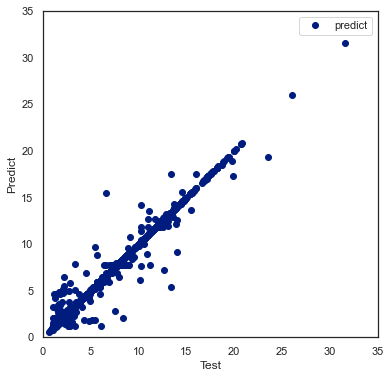

In [152]:
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set_context('notebook')
sns.set_style('white')
sns.set_palette('dark')

%matplotlib inline
fig = plt.figure(figsize=(6,6))
ax = plt.axes()

ph_test_predict = pd.DataFrame({'test':y_test.values,
                                'predict':y_test_pred_gr_sugar}).set_index('test').sort_index()
                              
ph_test_predict.plot(marker='o', ls='',ax=ax)
ax.set(xlabel='Test',ylabel='Predict',xlim=(0,35),ylim=(0,35));

### Another splitting method

In [153]:
from sklearn.model_selection import StratifiedShuffleSplit

feature_cols = [x for x in wineData.columns if x != 'residual_sugar']

SSS = StratifiedShuffleSplit(n_splits=1, test_size=0.2 ,random_state=0)
SSS.split(X,y)

# Get the index values from the generator
for train_index, test_index in SSS.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    


TRAIN: [1593 5630 2569 ... 1494 2590 4168] TEST: [1715 5568 1298 ... 5159  652 4712]


In [154]:
#create dataset
X_train = wineData.loc[train_index, feature_cols]
y_train = wineData.loc[train_index, 'residual_sugar']

X_test = wineData.loc[test_index, feature_cols]
y_test = wineData.loc[test_index, 'residual_sugar']
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor().fit(X_train, y_train)

param_grid = {'max_depth':range(1, dtr.tree_.max_depth+1, 2),
              'max_features': range(1, len(dtr.feature_importances_)+1)}

GR_sugar = GridSearchCV(DecisionTreeRegressor(random_state=42),
                  param_grid=param_grid,
                  scoring='neg_mean_squared_error',
                  n_jobs=-1)

GR_sugar = GR_sugar.fit(X_train,y_train)


In [155]:
sugar_pred = GR_sugar.predict(X_test)
sugar_pred

array([ 1.75125   ,  1.34444444,  1.7       , ...,  3.88571429,
        2.9       , 17.81923077])

In [156]:
GR_sugar.best_estimator_.tree_.node_count, GR_sugar.best_estimator_.tree_.max_depth
from sklearn.metrics import mean_squared_error

y_train_pred_gr_sugar = GR_sugar.predict(X_train)
y_test_pred_gr_sugar = GR_sugar.predict(X_test)

train_test_gr_sugar_error = pd.Series({'train':mean_squared_error(y_train,y_train_pred_gr_sugar),
                                      'test':mean_squared_error(y_test,y_test_pred_gr_sugar)},
                                      name='MSE').to_frame().T

train_test_gr_sugar_error


,train,test
MSE,0.235763,2.658115


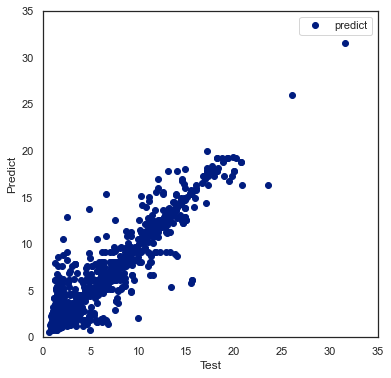

In [157]:
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set_context('notebook')
sns.set_style('white')
sns.set_palette('dark')

%matplotlib inline
fig = plt.figure(figsize=(6,6))
ax = plt.axes()

ph_test_predict = pd.DataFrame({'test':y_test.values,
                                'predict':y_test_pred_gr_sugar}).set_index('test').sort_index()
                              
ph_test_predict.plot(marker='o', ls='',ax=ax)
ax.set(xlabel='Test',ylabel='Predict',xlim=(0,35),ylim=(0,35));